## Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_prices = pd.read_csv('FB-stock-prices.csv')

df_prices.head(10)

,Date,Price
0,1/4/2021,269
1,1/5/2021,271
2,1/6/2021,263
3,1/7/2021,269
4,1/8/2021,268
5,1/11/2021,257
6,1/12/2021,251
7,1/13/2021,252
8,1/14/2021,246
9,1/15/2021,251


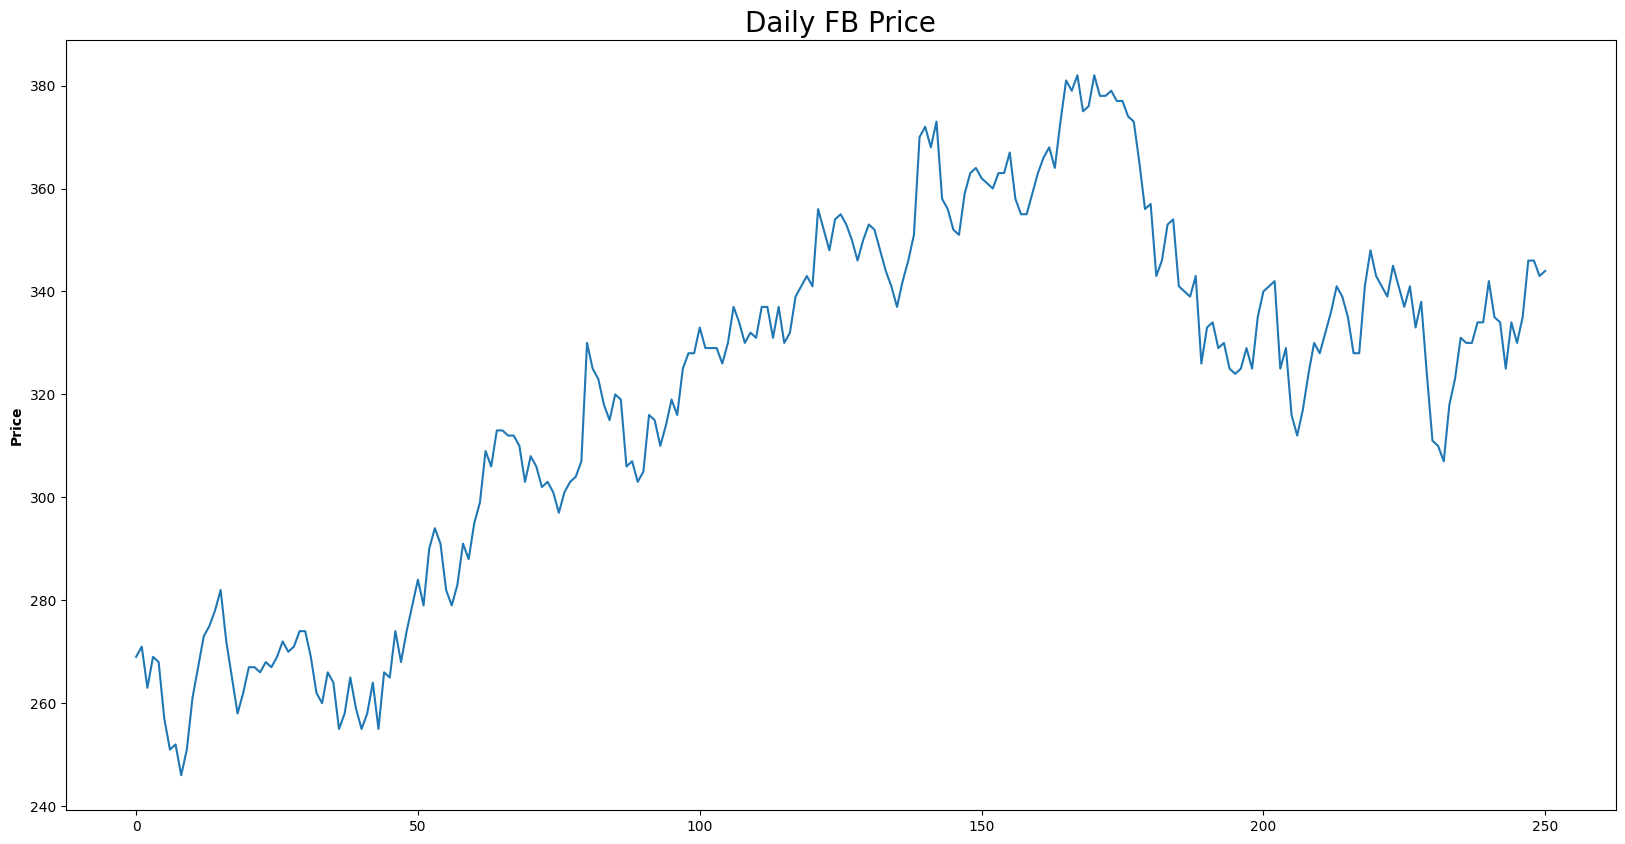

In [3]:
plt.figure(figsize=(20,10))
plt.title("Daily FB Price", fontsize=20)
plt.plot(df_prices["Price"])
plt.ylabel('Price', fontweight='bold')

plt.show()

## Data processing

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_prices = scaler.fit_transform(df_prices[["Price"]].values)

total_size = len(scaled_prices)
test_size = int(total_size * 0.2)

train_prices = scaled_prices[0:(total_size-test_size), :]
test_prices = scaled_prices[(total_size-test_size):, :]

In [5]:
def create_rnn_dataset(data, lookback=1):

    data_x, data_y = [], []

    for i in range(len(data)- lookback -1):
            a = data[i:(i+lookback), 0]
            data_x.append(a)
            data_y.append(data[i + lookback, 0])

    return np.array(data_x), np.array(data_y)


lookback=25

train_rnn_x, train_rnn_y = create_rnn_dataset(train_prices,lookback) # creating RNN dataset

train_rnn_x = np.reshape(train_rnn_x, (train_rnn_x.shape[0],1, train_rnn_x.shape[1])) # shapes to be used as RNN input

## Model

In [6]:
import tensorflow as tf

num_epochs = 10

model = tf.keras.Sequential()

model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

model.fit(train_rnn_x, train_rnn_y, epochs=num_epochs, batch_size=1)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4856 - mse: 0.4856
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0885 - mse: 0.0885
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0584 - mse: 0.0584
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0429 - mse: 0.0429
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0385 - mse: 0.0385
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0453 - mse: 0.0453
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0290 - mse: 0.0290
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0376 - mse: 0.0376
Epoch 9/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0333 - mse: 0.0333
Epoch 10/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0365 - mse: 0.0365


In [7]:
test_rnn_x, test_rnn_y = create_rnn_dataset(test_prices,lookback)

test_rnn_x = np.reshape(test_rnn_x, (test_rnn_x.shape[0],1, test_rnn_x.shape[1]))

model.evaluate(test_rnn_x, test_rnn_y, verbose=1)

predict_on_test = model.predict(test_rnn_x)

predict_on_test = scaler.inverse_transform(predict_on_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 0.0591 - mse: 0.0591
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


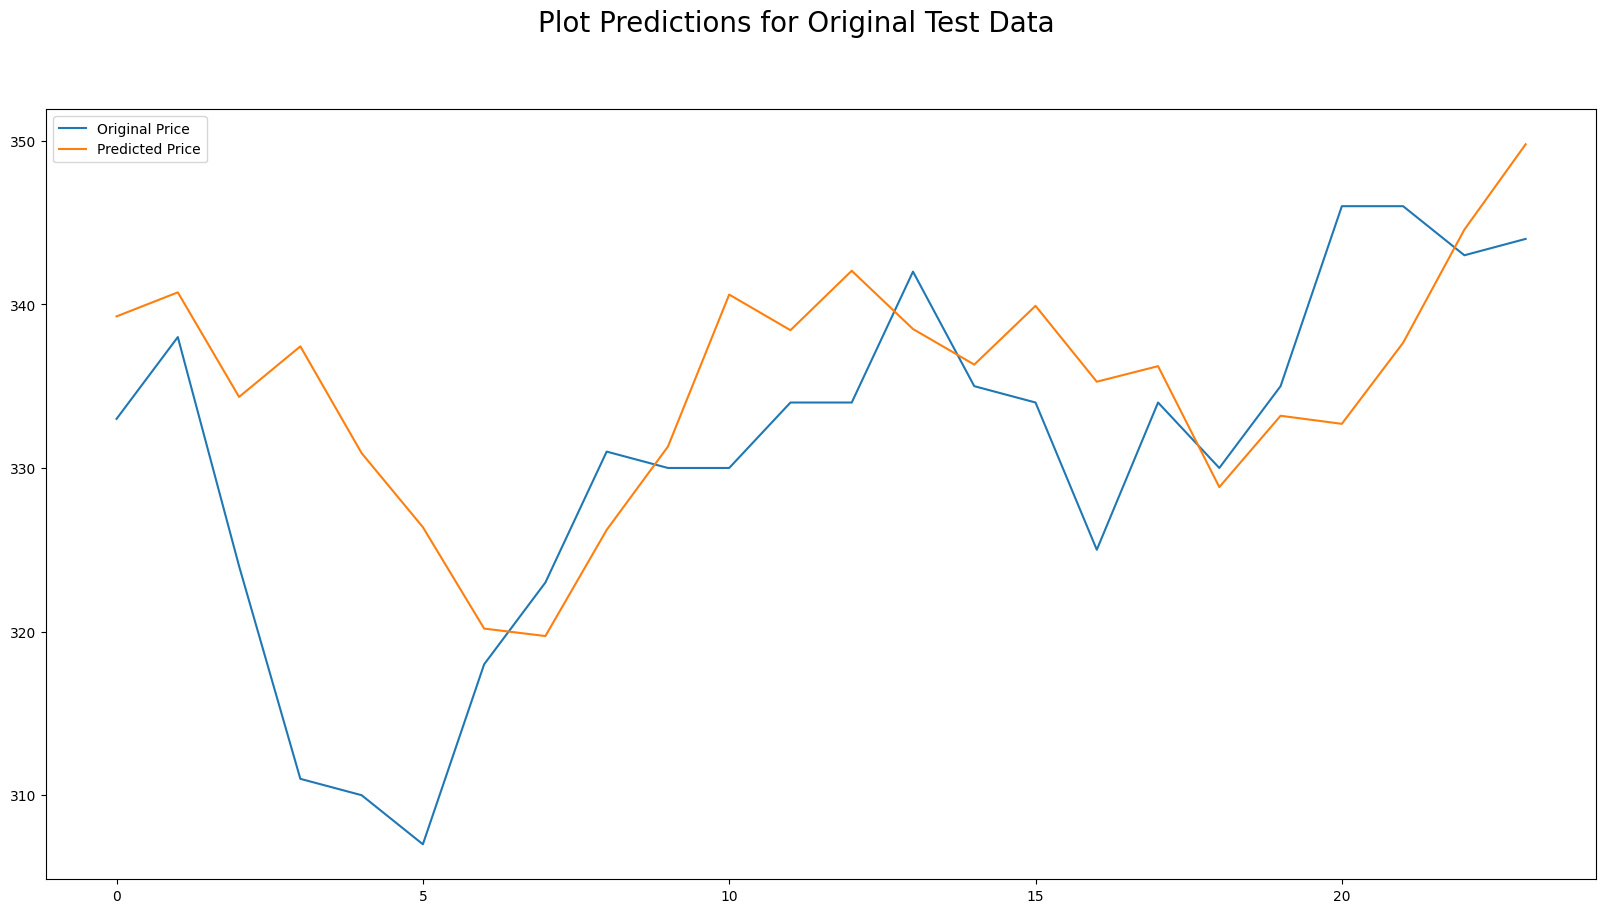

In [8]:
orig_test_values = df_prices[["Price"]].loc[total_size-len(predict_on_test):]
orig_test_values.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20,10)).suptitle("Plot Predictions for Original Test Data", fontsize=20)
plt.plot(orig_test_values, label="Original Price")
plt.plot(predict_on_test, label="Predicted Price")
plt.legend()
plt.show()

## Predictions

In [11]:
#Previous prices
previous_prices = np.array([325,335,340,341,342,
                            325,329,316,312,317,
                            324,330,328,332,336,
                            341,339,335,328,328,
                            341,348,343,341,339])

#Scale
scaled_prices = scaler.transform(previous_prices.reshape(-1, 1))
#Reshape
model_input = np.reshape(scaled_prices, (scaled_prices.shape[1],1, scaled_prices.shape[0]))

#predictions
prediction = model.predict(model_input)

#scale back
norm_prediction = scaler.inverse_transform(prediction)

print("The predicted Stock price is :", norm_prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
The predicted Stock price is : 344.60147
